In [24]:
%matplotlib inline

import numpy as np
from numpy import pi
import pylab as plt
from colorsys import hls_to_rgb
from math import degrees

def colorize(z):
    r = np.abs(z)
    arg = np.angle(z) 
    
    #rmin = np.min(r)
    #rmax = np.max(r)
    #print 'min modulus = ', rmin
    #print 'max  modulus = ', rmax
    
    dims = np.shape(z)
    N = dims[0]
    
    h = arg
    for i in range(N):
        for j in range(N):
            if (h[i,j] <0):
                h[i,j] = 2*pi + h[i,j]
            
    #
    # perform the NIST adjustments
    #
    
    h = h/(2*pi)*4.0
    for i in range(N):
        for j in range(N):
            if (0 <= h[i,j] < 1.0):
                h[i,j] = h[i,j]/6.0
            if (1.0 <= h[i,j] < 2.0):
                h[i,j] = (2.0*h[i,j] - 1.0)/6.0
            if (2.0 <= h[i,j] < 3.0):
                h[i,j] = (h[i,j] + 1.0)/6.0
            if (3.0 <= h[i,j] <= 4.0):
                h[i,j] = 2.0*(h[i,j] - 1.0)/6.0

    #
    # plot L as a log value
    #
    rlog = np.log10(r)
    l = (rlog + 16.0)/32.0
    np.place(l, l>1.0, 1.0)
    np.place(l, l<0.0, 0.0)
    s = 0.8

    c = np.vectorize(hls_to_rgb) (h,l,s) # --> tuple
    c = np.array(c)  # -->  array of (3,n,m) shape, but need (n,m,3)
    c = c.swapaxes(0,2) 
    return c


[ 0.   0.2  0.4  0.6  0.8  1. ]
<a list of 6 Text xticklabel objects>


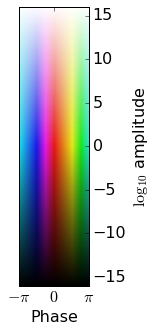

In [36]:
import sys

N=1000

x0 = -np.pi
x1 = np.pi
y0 = -16
y1 = 16

x,y = np.ogrid[x0:x1:N*1j, y1:y0:N*1j]
z = x + 1j*y
w = (10.0**y)*np.exp(1j*x)

img = colorize(w)
rat = (y1 - y0)/(x1-x0)


f = plt.figure()
ax = f.add_subplot(111)
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
#plt.plot([2,3,4,5])
#plt.show()

plt.rcParams['figure.figsize'] = (5.0/4, 5.0)
##plt.rcParams['figure.figsize'] = (12.0, 12.0)
plt.xlabel('Phase')

locs, labels = plt.xticks()
print locs
print labels

plt.xticks([-np.pi, 0.0, np.pi], (r'$-\pi$', r'$0$', r'$\pi$'))

##plt.yaxis.set_label_position("right")
plt.ylabel(r'$\log_{10}$ amplitude')
plt.rc("font", size=16)
#plt.title('Complex amplitude/phase scheme')
plt.imshow(img, extent=[x0, x1, y0, y1], aspect="auto")